# Série temporal com Facebook Prophet - previsão de visualizações diárias de páginas web

## Instalação da biblioteca e importação da base de dados

- Visualizações diárias de uma página web da Wikipedia: https://en.wikipedia.org/wiki/Peyton_Manning

In [ ]:
!pip install fbprophet

In [2]:
from fbprophet import Prophet
import pandas as pd

In [3]:
dataset = pd.read_csv('/content/page_wikipedia.csv')
dataset

,date,views
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [4]:
dataset.describe()

,views
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


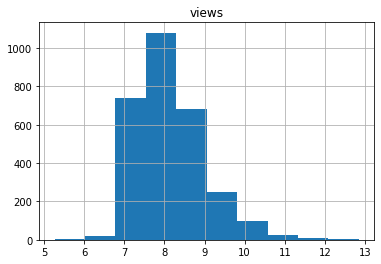

In [5]:
dataset.hist();

In [6]:
dataset = dataset[['date', 'views']].rename(columns = {'date': 'ds', 'views': 'y'})
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [7]:
dataset = dataset.sort_values(by = 'ds')
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


## Construção do modelo e previsões

In [8]:
model = Prophet()
model.fit(dataset)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

In [10]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.040603,8.246911,9.514334,8.040603,8.040603,0.803055,0.803055,0.803055,0.352293,0.352293,0.352293,0.450762,0.450762,0.450762,0.0,0.0,0.0,8.843657
1,2007-12-11,8.039061,7.990644,9.208329,8.039061,8.039061,0.553139,0.553139,0.553139,0.119645,0.119645,0.119645,0.433495,0.433495,0.433495,0.0,0.0,0.0,8.592200
2,2007-12-12,8.037518,7.802108,8.971303,8.037518,8.037518,0.350502,0.350502,0.350502,-0.066660,-0.066660,-0.066660,0.417162,0.417162,0.417162,0.0,0.0,0.0,8.388020
3,2007-12-13,8.035976,7.788301,9.002271,8.035976,8.035976,0.329951,0.329951,0.329951,-0.072258,-0.072258,-0.072258,0.402209,0.402209,0.402209,0.0,0.0,0.0,8.365927
4,2007-12-14,8.034434,7.726237,8.934860,8.034434,8.034434,0.319465,0.319465,0.319465,-0.069577,-0.069577,-0.069577,0.389042,0.389042,0.389042,0.0,0.0,0.0,8.353899


In [11]:
len(dataset), len(forecast)

(2905, 2995)

In [12]:
len(forecast) - len(dataset)

90

In [14]:
forecast.tail(90)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2905,2016-01-21,7.555356,7.915262,9.152016,7.555356,7.555356,0.999964,0.999964,0.999964,-0.072258,-0.072258,-0.072258,1.072222,1.072222,1.072222,0.0,0.0,0.0,8.555319
2906,2016-01-22,7.554321,7.953600,9.180307,7.554321,7.554321,1.016945,1.016945,1.016945,-0.069577,-0.069577,-0.069577,1.086522,1.086522,1.086522,0.0,0.0,0.0,8.571266
2907,2016-01-23,7.553286,7.717279,8.951068,7.553286,7.553286,0.786647,0.786647,0.786647,-0.311718,-0.311718,-0.311718,1.098365,1.098365,1.098365,0.0,0.0,0.0,8.339933
2908,2016-01-24,7.552251,8.076889,9.338278,7.552251,7.552251,1.155631,1.155631,1.155631,0.048276,0.048276,0.048276,1.107355,1.107355,1.107355,0.0,0.0,0.0,8.707882
2909,2016-01-25,7.551216,8.360192,9.681854,7.551216,7.551216,1.465374,1.465374,1.465374,0.352293,0.352293,0.352293,1.113081,1.113081,1.113081,0.0,0.0,0.0,9.016590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,2016-04-15,7.467387,6.267661,7.528618,7.440633,7.496123,-0.560917,-0.560917,-0.560917,-0.069577,-0.069577,-0.069577,-0.491340,-0.491340,-0.491340,0.0,0.0,0.0,6.906470
2991,2016-04-16,7.466352,6.051380,7.284121,7.438754,7.495685,-0.772972,-0.772972,-0.772972,-0.311718,-0.311718,-0.311718,-0.461254,-0.461254,-0.461254,0.0,0.0,0.0,6.693380
2992,2016-04-17,7.465317,6.484057,7.689186,7.436832,7.495729,-0.383291,-0.383291,-0.383291,0.048276,0.048276,0.048276,-0.431567,-0.431567,-0.431567,0.0,0.0,0.0,7.082026
2993,2016-04-18,7.464282,6.783817,8.027181,7.435007,7.495383,-0.050726,-0.050726,-0.050726,0.352293,0.352293,0.352293,-0.403019,-0.403019,-0.403019,0.0,0.0,0.0,7.413556


## Gráfico das previsões

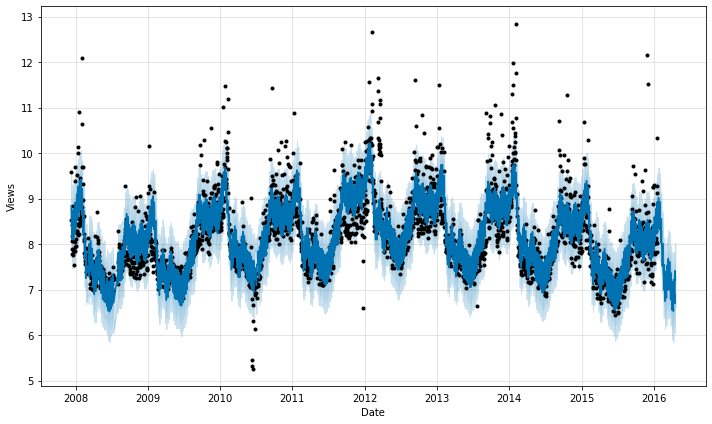

In [15]:
model.plot(forecast, xlabel = 'Date', ylabel = 'Views');

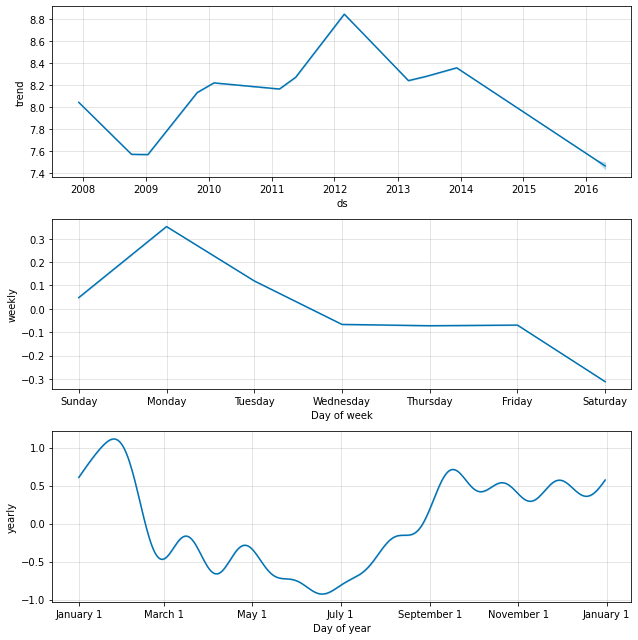

In [16]:
model.plot_components(forecast);

In [17]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [18]:
plot_plotly(model, forecast)

In [20]:
plot_components_plotly(model, forecast)